### This notebook shows some examples of plotting in Seaborn library

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib notebook

#### Scatterplot #### 


Scatterplot with categorical variables

In [22]:
# Load the example iris dataset
iris = sns.load_dataset("iris")

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<IPython.core.display.Javascript object>


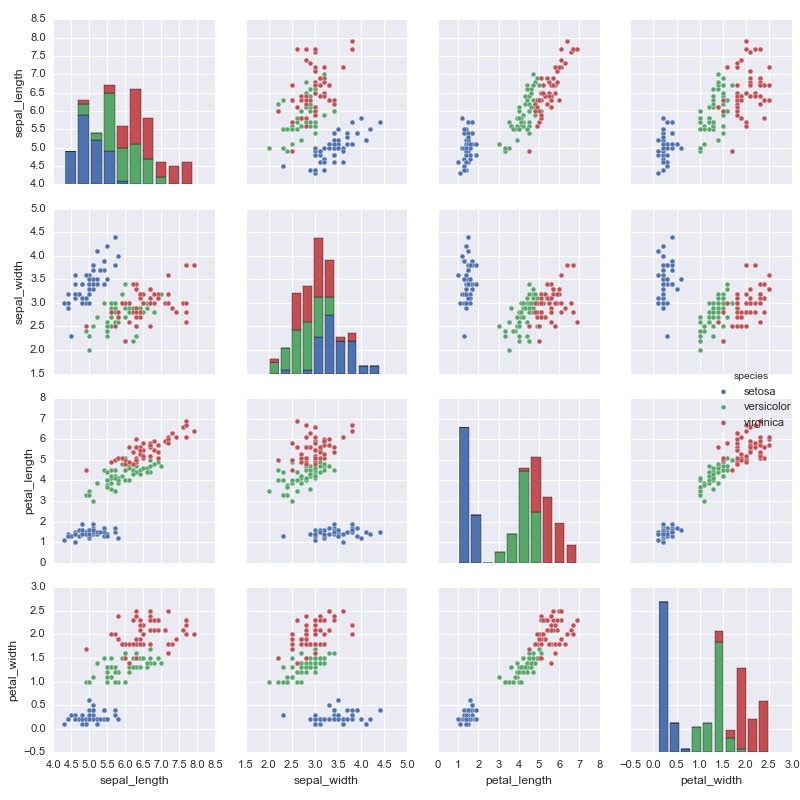

In [28]:
# set default properties for the plot
sns.set()

sns.pairplot(iris, hue="species")

In [26]:
sns.set?

In [18]:
# "Melt" the dataset to "long-form" or "tidy" representation
iris = pd.melt(iris, "species", var_name="measurement")

iris.head()

,species,measurement,value
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9
2,setosa,sepal_length,4.7
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.0


<IPython.core.display.Javascript object>


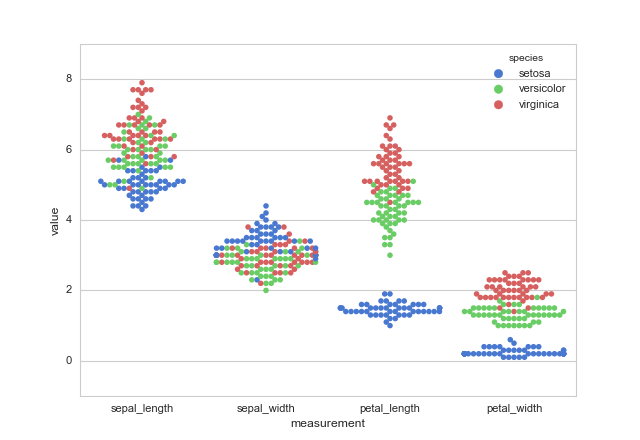

In [19]:
sns.set(style="whitegrid", palette="muted")

# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="measurement", y="value", hue="species", data=iris)

[Kendall rank correlation coefficient](https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient)

The Kendall rank coefficient is often used as a test statistic in a statistical hypothesis test to establish whether two variables may be regarded as statistically dependent. This test is non-parametric, as it does not rely on any assumptions on the distributions of X or Y or the distribution of (X,Y).

<IPython.core.display.Javascript object>


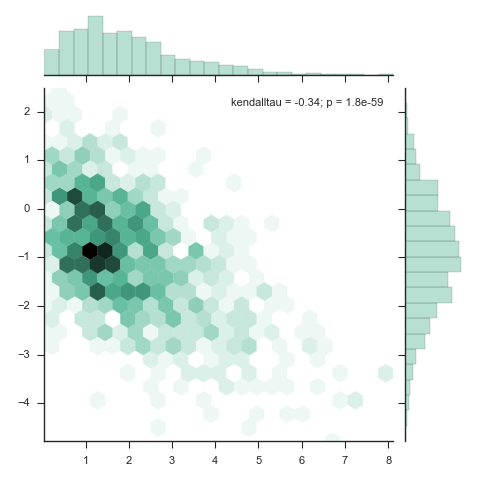

In [29]:
import numpy as np
from scipy.stats import kendalltau

sns.set(style="ticks")

rs = np.random.RandomState(11)
x = rs.gamma(2, size=1000)
y = -.5 * x + rs.normal(size=1000)

sns.jointplot(x, y, kind="hex", stat_func=kendalltau, color="#4CB391")

#### [Cubehelix Palette](http://stanford.edu/~mwaskom/software/seaborn/examples/cubehelix_palette.html)

<IPython.core.display.Javascript object>


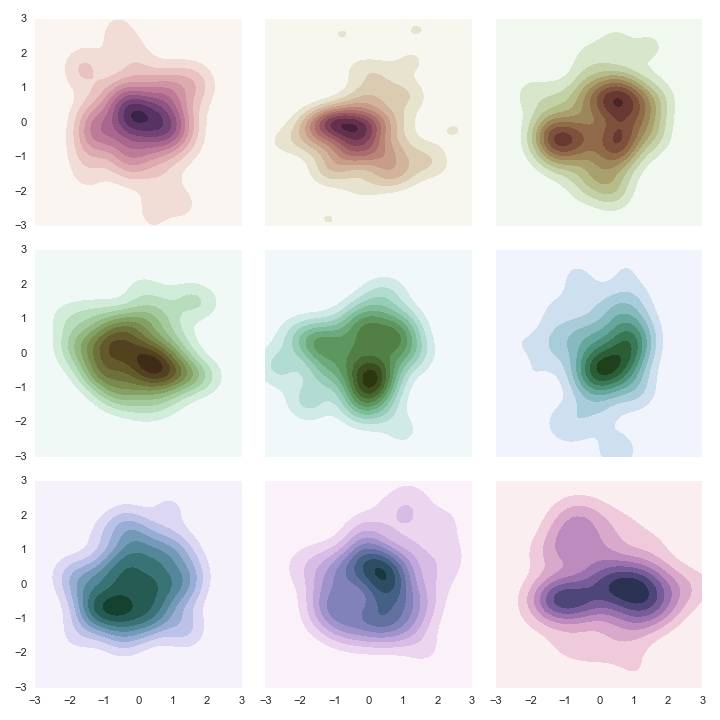

In [33]:
sns.set(style="dark")
rs = np.random.RandomState(50)

# Set up the matplotlib figure
f, axes = plt.subplots(3, 3, figsize=(9, 9), sharex=True, sharey=True)

# Rotate the starting point around the cubehelix hue circle
for ax, s in zip(axes.flat, np.linspace(0, 3, 10)):

    # Create a cubehelix colormap to use with kdeplot
    cmap = sns.cubehelix_palette(start=s, light=1, as_cmap=True)

    # Generate and plot a random bivariate dataset
    x, y = rs.randn(2, 50)
    sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=ax)
    ax.set(xlim=(-3, 3), ylim=(-3, 3))

f.tight_layout()